# 🧪 Titanic Dataset EDA
Exploratory Data Analysis using Pandas, Seaborn, and Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Summary Statistics

In [2]:
# Generate summary statistics (mean, median, std, etc.)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 📉 Histograms and Boxplots for Numeric Features

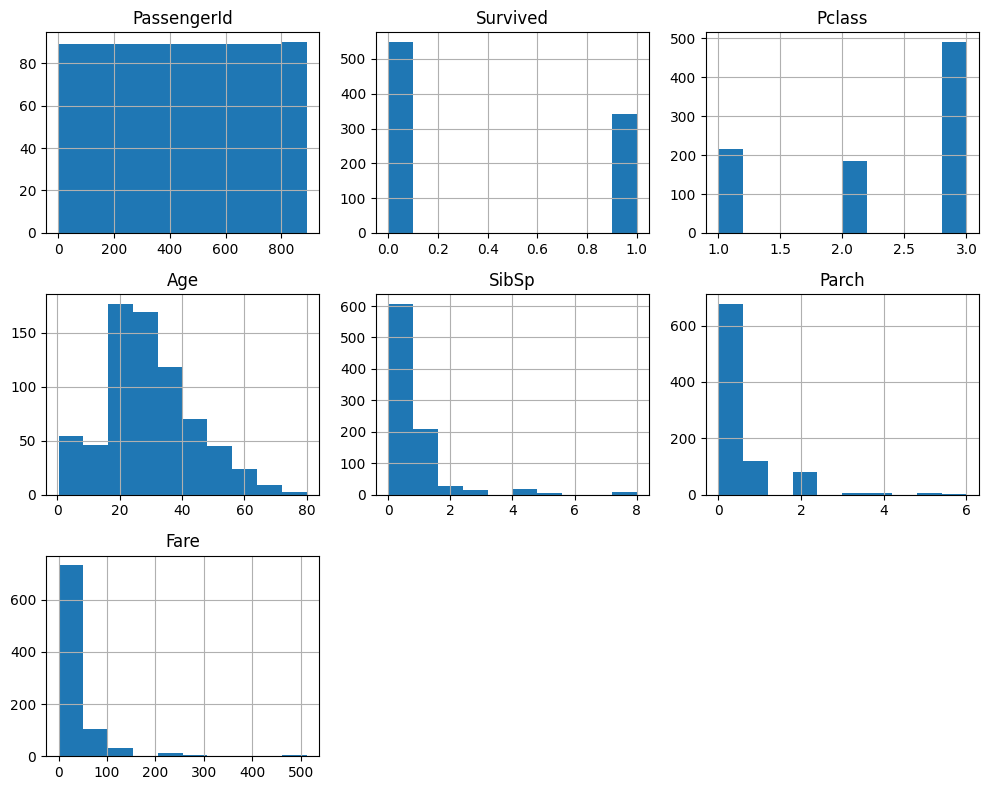

In [5]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

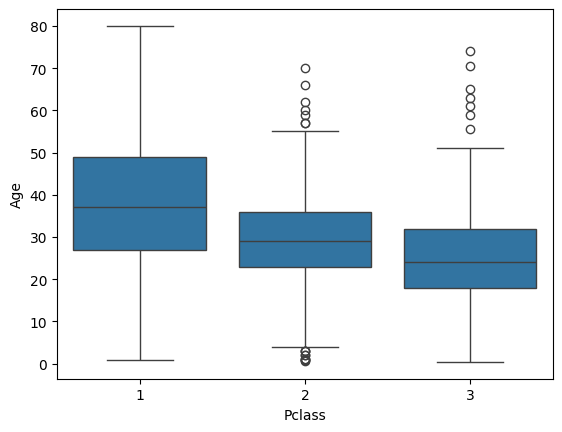

In [6]:
sns.boxplot(data=df, x='Pclass', y='Age')

## 🔗 Feature Relationships (Pairplot and Correlation Matrix)

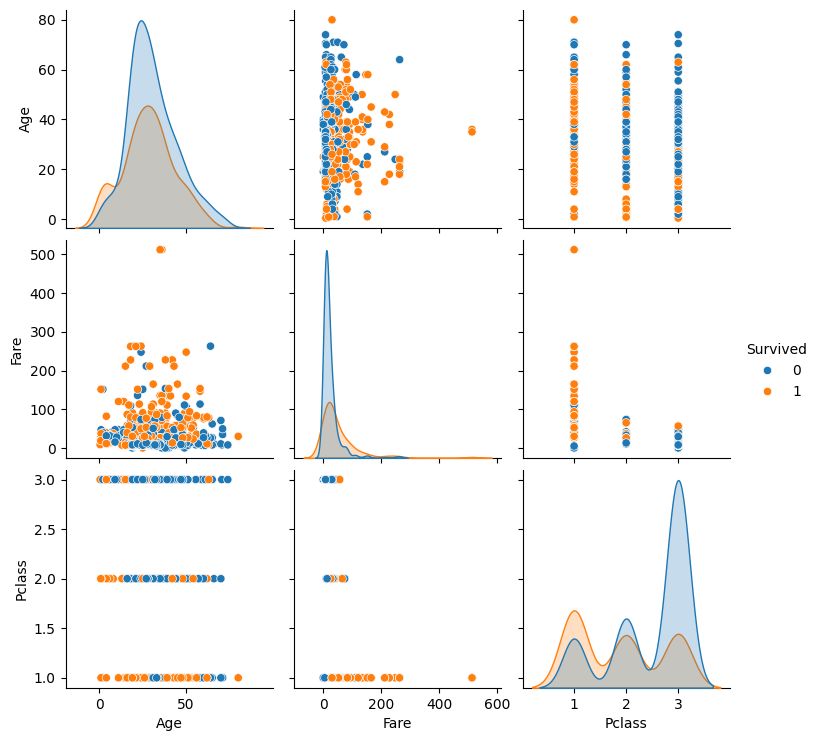

In [7]:
# Pairplot (to see relationships)
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']].dropna(), hue='Survived')

<Axes: >

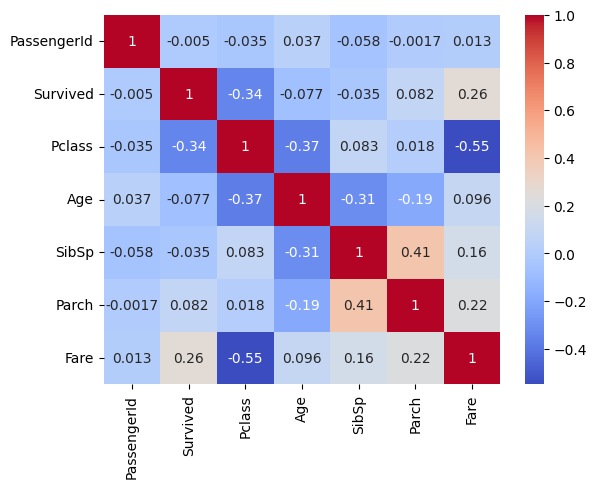

In [8]:
# Correlation Matrix + Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

## 🔍 Identifying Patterns, Trends, and Anomalies

In [9]:
# Grouped insights
df.groupby('Survived')['Age'].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [10]:
df.groupby('Pclass')['Fare'].median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


<Axes: xlabel='Sex', ylabel='count'>

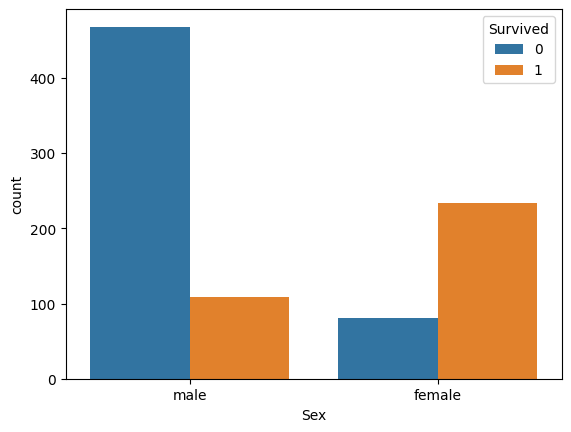

In [11]:
# Survived by gender/class
sns.countplot(data=df, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

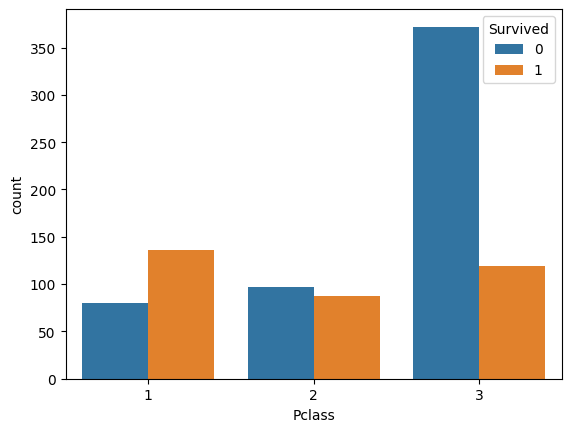

In [12]:
sns.countplot(data=df, x='Pclass', hue='Survived')

## ✅ Feature-Level Inferences from Visuals

<Axes: xlabel='Sex', ylabel='count'>

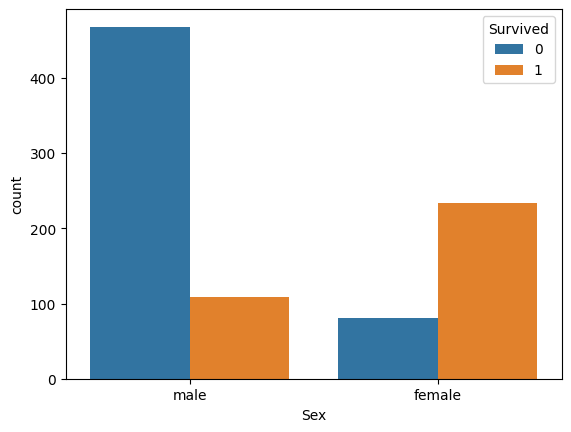

In [13]:
# 1. Survival Rate by Gender
sns.countplot(data=df, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

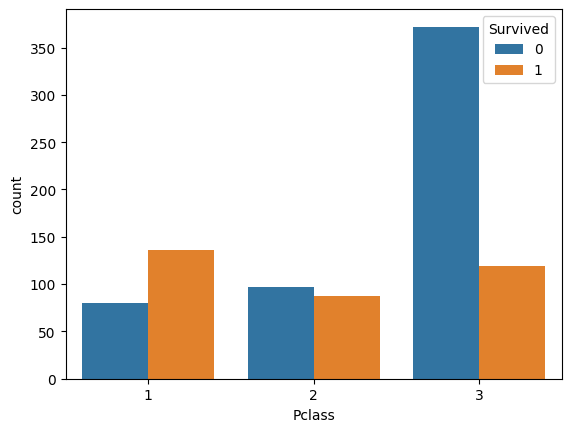

In [14]:
# 2. Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

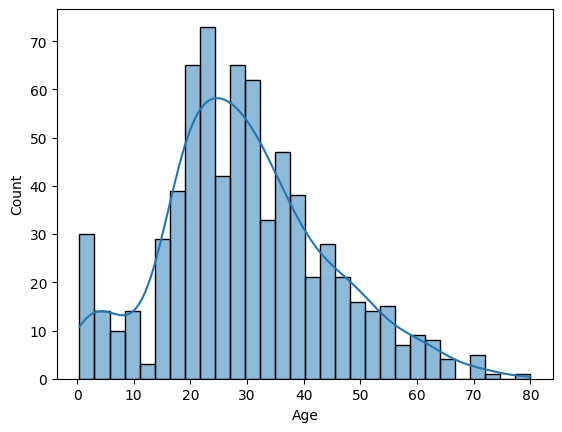

In [15]:
# 3. Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)

<Axes: xlabel='Survived', ylabel='Fare'>

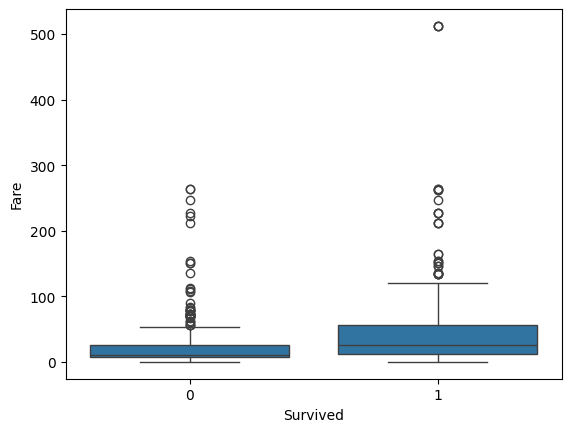

In [16]:
# 4. Fare vs. Survival
sns.boxplot(data=df, x='Survived', y='Fare')

<Axes: >

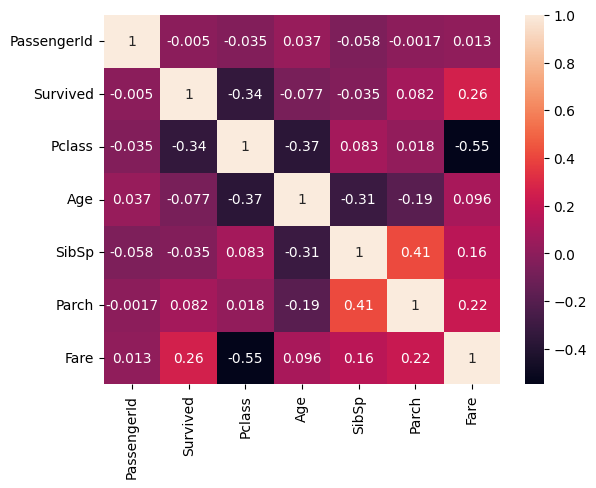

In [17]:
# 5. Heatmap for Correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)